In [8]:
import os, sys
os.chdir(r"D:\User\Desktop\dl_project")
sys.path.insert(0, os.getcwd())
print(os.getcwd())


D:\User\Desktop\dl_project


In [2]:
from src.data import load_mnist_numpy
from src.section2_optim_numpy import init_two_layer, grad_check

X_train, y_train, X_test, y_test = load_mnist_numpy()

Xb = X_train[:10]
yb = y_train[:10]

params = init_two_layer(784, 32, 10, activation="tanh", seed=42)
report = grad_check(params, Xb, yb, activation="tanh", h=1e-5, num_checks=25)

print(report)


{'W1': 3.498796605972096e-09, 'b1': 9.896188100520623e-09, 'W2': 2.8033106976487566e-09, 'b2': 1.708861511812883e-09}


[sgd|constant] Epoch 1/12 lr=0.01000 train_loss=1.3960 train_acc=0.6709 test_acc=0.8401
[sgd|constant] Epoch 2/12 lr=0.01000 train_loss=0.6300 train_acc=0.8528 test_acc=0.8790
[sgd|constant] Epoch 3/12 lr=0.01000 train_loss=0.4773 train_acc=0.8766 test_acc=0.8913
[sgd|constant] Epoch 4/12 lr=0.01000 train_loss=0.4162 train_acc=0.8865 test_acc=0.8999
[sgd|constant] Epoch 5/12 lr=0.01000 train_loss=0.3816 train_acc=0.8942 test_acc=0.9037
[sgd|constant] Epoch 6/12 lr=0.01000 train_loss=0.3581 train_acc=0.8996 test_acc=0.9081
[sgd|constant] Epoch 7/12 lr=0.01000 train_loss=0.3407 train_acc=0.9039 test_acc=0.9124
[sgd|constant] Epoch 8/12 lr=0.01000 train_loss=0.3267 train_acc=0.9075 test_acc=0.9149
[sgd|constant] Epoch 9/12 lr=0.01000 train_loss=0.3151 train_acc=0.9102 test_acc=0.9164
[sgd|constant] Epoch 10/12 lr=0.01000 train_loss=0.3051 train_acc=0.9132 test_acc=0.9183
[sgd|constant] Epoch 11/12 lr=0.01000 train_loss=0.2961 train_acc=0.9164 test_acc=0.9221
[sgd|constant] Epoch 12/12 lr=

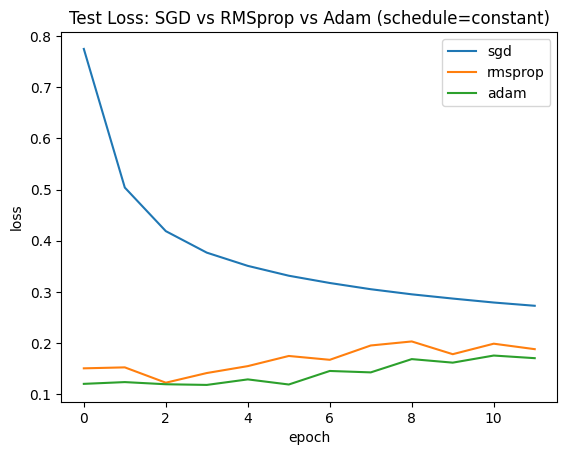

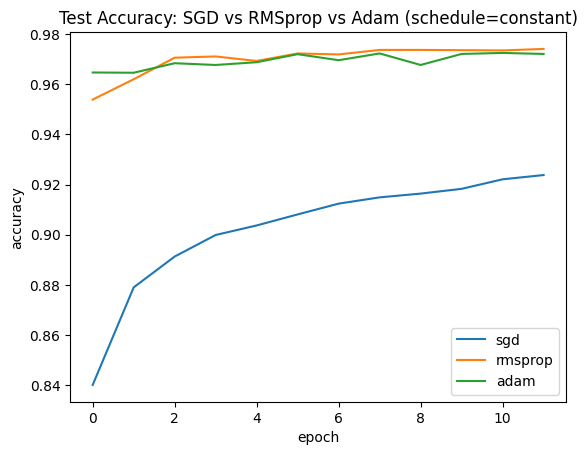

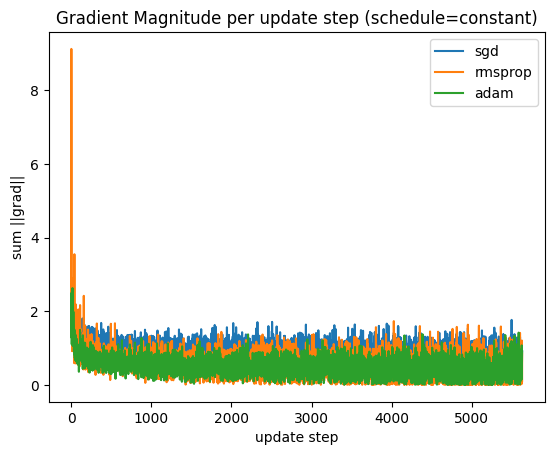

In [3]:
from src.section2_optim_numpy import compare_optimizers

results = compare_optimizers(X_train, y_train, X_test, y_test,
                            activation="relu", hidden_dim=128,
                            epochs=12, lr0=0.01, schedule="constant")


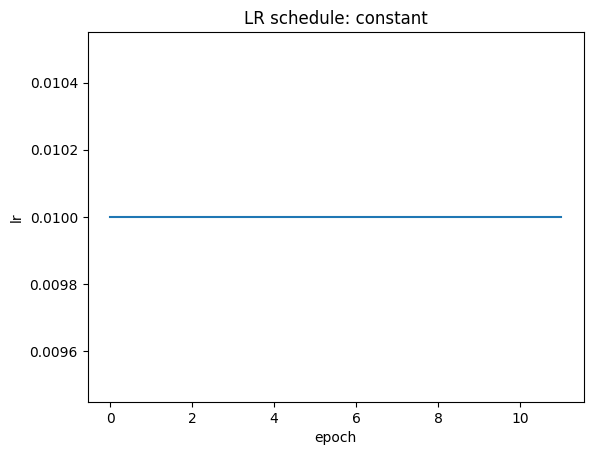

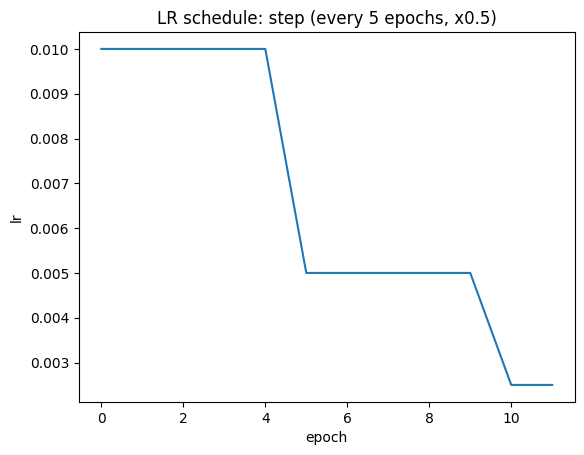

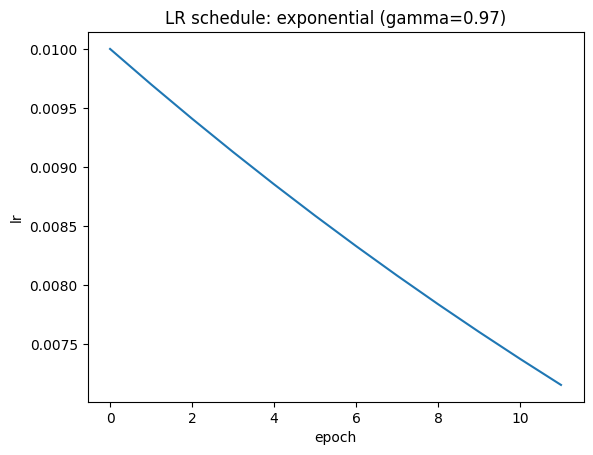

In [4]:
import numpy as np
from src.utils import plot_lr_schedule

def lr_constant(lr0, epochs):
    return [lr0]*epochs

def lr_step(lr0, epochs, step_every=5, gamma=0.5):
    lrs = []
    lr = lr0
    for ep in range(epochs):
        if ep > 0 and ep % step_every == 0:
            lr *= gamma
        lrs.append(lr)
    return lrs

def lr_exp(lr0, epochs, gamma=0.97):
    return [lr0*(gamma**ep) for ep in range(epochs)]

epochs = 12
plot_lr_schedule(lr_constant(0.01, epochs), "LR schedule: constant")
plot_lr_schedule(lr_step(0.01, epochs, step_every=5, gamma=0.5), "LR schedule: step (every 5 epochs, x0.5)")
plot_lr_schedule(lr_exp(0.01, epochs, gamma=0.97), "LR schedule: exponential (gamma=0.97)")


In [5]:
from src.section2_optim_numpy import train_two_layer

for sched in ["constant", "step", "exp"]:
    _, hist = train_two_layer(X_train, y_train, X_test, y_test,
                              hidden_dim=128, activation="relu",
                              optimizer="adam", lr0=0.01, epochs=12,
                              schedule=sched)


[adam|constant] Epoch 1/12 lr=0.01000 train_loss=0.2172 train_acc=0.9351 test_acc=0.9647
[adam|constant] Epoch 2/12 lr=0.01000 train_loss=0.1081 train_acc=0.9668 test_acc=0.9646
[adam|constant] Epoch 3/12 lr=0.01000 train_loss=0.0849 train_acc=0.9745 test_acc=0.9684
[adam|constant] Epoch 4/12 lr=0.01000 train_loss=0.0729 train_acc=0.9780 test_acc=0.9677
[adam|constant] Epoch 5/12 lr=0.01000 train_loss=0.0652 train_acc=0.9801 test_acc=0.9688
[adam|constant] Epoch 6/12 lr=0.01000 train_loss=0.0602 train_acc=0.9818 test_acc=0.9720
[adam|constant] Epoch 7/12 lr=0.01000 train_loss=0.0602 train_acc=0.9820 test_acc=0.9696
[adam|constant] Epoch 8/12 lr=0.01000 train_loss=0.0518 train_acc=0.9847 test_acc=0.9723
[adam|constant] Epoch 9/12 lr=0.01000 train_loss=0.0520 train_acc=0.9855 test_acc=0.9677
[adam|constant] Epoch 10/12 lr=0.01000 train_loss=0.0517 train_acc=0.9854 test_acc=0.9721
[adam|constant] Epoch 11/12 lr=0.01000 train_loss=0.0442 train_acc=0.9877 test_acc=0.9725
[adam|constant] Epo

[adam|step] Epoch 1/12 lr=0.01000 train_loss=0.2172 train_acc=0.9351 test_acc=0.9647
[adam|step] Epoch 2/12 lr=0.01000 train_loss=0.1081 train_acc=0.9668 test_acc=0.9646
[adam|step] Epoch 3/12 lr=0.01000 train_loss=0.0849 train_acc=0.9745 test_acc=0.9684
[adam|step] Epoch 4/12 lr=0.01000 train_loss=0.0729 train_acc=0.9780 test_acc=0.9677
[adam|step] Epoch 5/12 lr=0.01000 train_loss=0.0652 train_acc=0.9801 test_acc=0.9688
[adam|step] Epoch 6/12 lr=0.00500 train_loss=0.0304 train_acc=0.9900 test_acc=0.9753
[adam|step] Epoch 7/12 lr=0.00500 train_loss=0.0177 train_acc=0.9941 test_acc=0.9794
[adam|step] Epoch 8/12 lr=0.00500 train_loss=0.0131 train_acc=0.9953 test_acc=0.9792
[adam|step] Epoch 9/12 lr=0.00500 train_loss=0.0135 train_acc=0.9956 test_acc=0.9789
[adam|step] Epoch 10/12 lr=0.00500 train_loss=0.0159 train_acc=0.9946 test_acc=0.9759
[adam|step] Epoch 11/12 lr=0.00250 train_loss=0.0073 train_acc=0.9975 test_acc=0.9794
[adam|step] Epoch 12/12 lr=0.00250 train_loss=0.0020 train_acc=

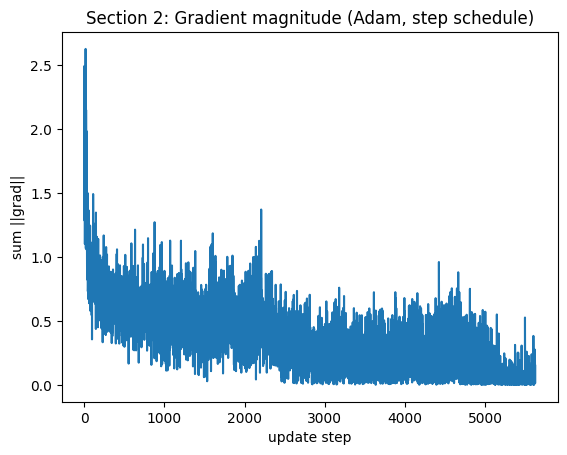

In [6]:
from src.section2_optim_numpy import train_two_layer
import matplotlib.pyplot as plt

params, hist = train_two_layer(X_train, y_train, X_test, y_test,
                               optimizer="adam", schedule="step",
                               epochs=12, lr0=0.01)

plt.figure()
plt.plot(hist["grad_norm"])
plt.title("Section 2: Gradient magnitude (Adam, step schedule)")
plt.xlabel("update step")
plt.ylabel("sum ||grad||")
plt.show()


[adam|step] Epoch 1/12 lr=0.01000 train_loss=0.2172 train_acc=0.9351 test_acc=0.9647
[adam|step] Epoch 2/12 lr=0.01000 train_loss=0.1081 train_acc=0.9668 test_acc=0.9646
[adam|step] Epoch 3/12 lr=0.01000 train_loss=0.0849 train_acc=0.9745 test_acc=0.9684
[adam|step] Epoch 4/12 lr=0.01000 train_loss=0.0729 train_acc=0.9780 test_acc=0.9677
[adam|step] Epoch 5/12 lr=0.01000 train_loss=0.0652 train_acc=0.9801 test_acc=0.9688
[adam|step] Epoch 6/12 lr=0.00500 train_loss=0.0304 train_acc=0.9900 test_acc=0.9753
[adam|step] Epoch 7/12 lr=0.00500 train_loss=0.0177 train_acc=0.9941 test_acc=0.9794
[adam|step] Epoch 8/12 lr=0.00500 train_loss=0.0131 train_acc=0.9953 test_acc=0.9792
[adam|step] Epoch 9/12 lr=0.00500 train_loss=0.0135 train_acc=0.9956 test_acc=0.9789
[adam|step] Epoch 10/12 lr=0.00500 train_loss=0.0159 train_acc=0.9946 test_acc=0.9759
[adam|step] Epoch 11/12 lr=0.00250 train_loss=0.0073 train_acc=0.9975 test_acc=0.9794
[adam|step] Epoch 12/12 lr=0.00250 train_loss=0.0020 train_acc=

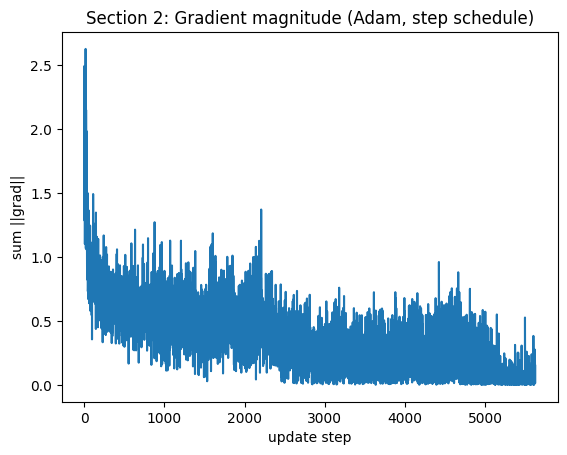

In [7]:
from src.section2_optim_numpy import train_two_layer
import matplotlib.pyplot as plt

params, hist = train_two_layer(X_train, y_train, X_test, y_test,
                               optimizer="adam", schedule="step",
                               epochs=12, lr0=0.01)

plt.figure()
plt.plot(hist["grad_norm"])
plt.title("Section 2: Gradient magnitude (Adam, step schedule)")
plt.xlabel("update step")
plt.ylabel("sum ||grad||")
plt.show()


In [9]:
from src.section2_config import load_section2_config
from src.section2_optim_numpy import train_two_layer

cfg = load_section2_config("configs/section2.yaml")

params, hist = train_two_layer(
    X_train, y_train, X_test, y_test,
    hidden_dim=cfg.model["hidden_dim"],
    activation=cfg.model["activation"],
    optimizer=cfg.train["optimizer"],
    lr0=cfg.train["lr0"],
    epochs=cfg.train["epochs"],
    batch_size=cfg.data["batch_size"],
    schedule=cfg.train["schedule"],
    seed=cfg.train["seed"],
)


[adam|step] Epoch 1/12 lr=0.01000 train_loss=0.2172 train_acc=0.9351 test_acc=0.9647
[adam|step] Epoch 2/12 lr=0.01000 train_loss=0.1081 train_acc=0.9668 test_acc=0.9646
[adam|step] Epoch 3/12 lr=0.01000 train_loss=0.0849 train_acc=0.9745 test_acc=0.9684
[adam|step] Epoch 4/12 lr=0.01000 train_loss=0.0729 train_acc=0.9780 test_acc=0.9677
[adam|step] Epoch 5/12 lr=0.01000 train_loss=0.0652 train_acc=0.9801 test_acc=0.9688
[adam|step] Epoch 6/12 lr=0.00500 train_loss=0.0304 train_acc=0.9900 test_acc=0.9753
[adam|step] Epoch 7/12 lr=0.00500 train_loss=0.0177 train_acc=0.9941 test_acc=0.9794
[adam|step] Epoch 8/12 lr=0.00500 train_loss=0.0131 train_acc=0.9953 test_acc=0.9792
[adam|step] Epoch 9/12 lr=0.00500 train_loss=0.0135 train_acc=0.9956 test_acc=0.9789
[adam|step] Epoch 10/12 lr=0.00500 train_loss=0.0159 train_acc=0.9946 test_acc=0.9759
[adam|step] Epoch 11/12 lr=0.00250 train_loss=0.0073 train_acc=0.9975 test_acc=0.9794
[adam|step] Epoch 12/12 lr=0.00250 train_loss=0.0020 train_acc=